# (Relation between trip time to trip duration ford Gobike)
## by (Mohamed Momen)

## Investigation Overview

In this investigation I will show the realtion between the rent time, user type and the time duration

## Dataset Overview

The ford Gobike dataset contains the trips data for April 2019 consists of duration by seconds, user type (customer - subscriber) , time of the trip and gegraphical location and start and end time

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201904-fordgobike.csv')

In [4]:
df['start_hour'] = pd.to_datetime(df.start_time).dt.hour
df['end_hour'] = pd.to_datetime(df.start_time).dt.hour
df['distance'] = np.sqrt((df['start_station_latitude']-df['end_station_latitude'])**2
                        +(df['start_station_longitude']-df['end_station_longitude'])**2)
df['day_week'] = pd.to_datetime(df.start_time).dt.day_name()
df['duration_minutes'] = df['duration_sec']//60
df2 = df.query('duration_minutes <= 60')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distrbution of trip duration in minutes

trips' duration in the dataset take on a very large range of values, from about 1 minute at the lowest, to near 24 hours at the highest and with average 12.8 minute. Plotted on a logarithmic scale, the distribution of trip duration in minutes takes on a multimodal shape squeezed to the lift.

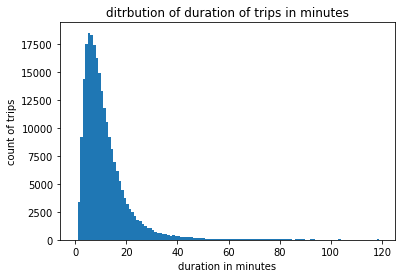

In [25]:
binsize = 1
bins = np.arange(0, 120, binsize)
plt.hist(data=df, x='duration_minutes', bins = bins);
plt.xlabel('duration in minutes')
plt.ylabel('count of trips')
plt.title('ditrbution of duration of trips in minutes')
plt.show()

## Distrbution of the user types

Almost 85% of the users are subscriper users

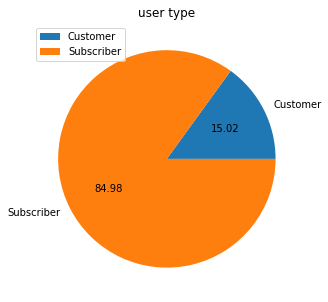

In [30]:
fig = df.user_type.groupby(df.user_type).count().plot(kind='pie', autopct='%.2f',  title='user type', figsize=(5,5));
plt.ylabel('');
plt.legend(loc="upper left");

## Distrbution of number of trips on each day of the week days

we can note that number of trips on weekdays is greater than on weekends and reaching the maximum on tuesday

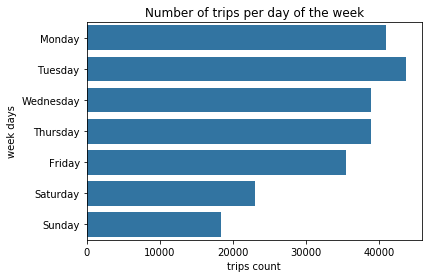

In [28]:
#trips per week day 
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sb.color_palette()[0]
sb.countplot(data= df, y= 'day_week', color=base_color, order= days_order)
plt.ylabel('week days')
plt.xlabel('trips count')
plt.title('Number of trips per day of the week')
plt.show()

## Relation between days of the week and trip duration in minutes

Although the number of trips decreases in weekends the average time of the trip increases

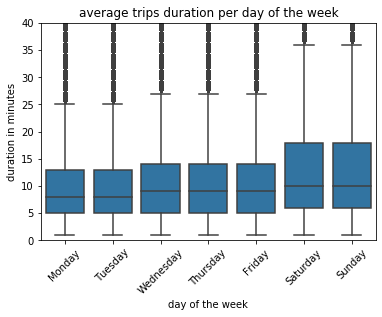

In [13]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'day_week', y = 'duration_minutes', color=base_color, order=days_order)
plt.xlabel('day of the week')
plt.ylim([0, 40])
plt.ylabel('duration in minutes')
plt.title('average trips duration per day of the week')
plt.xticks(rotation=45)
plt.show()

## Relation between the average time of rent and the user type
On average the subscriper users rent bikes for shorter time duration than the customer on log scale 

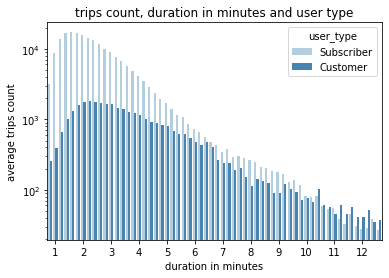

In [19]:
g= sb.countplot(data = df2, x = 'duration_minutes', hue = 'user_type', palette = 'Blues')
g.set_yscale('log')
plt.xticks(np.arange(min(df2['duration_minutes']), max(df2['duration_minutes'])+1, 5.0))
plt.ylabel('average trips count')
plt.xlabel('duration in minutes')
plt.title('trips count, duration in minutes and user type');

## Average of duration in minutes over start hour and days of the week

It is clear that in the weekends (Sundays and Saturdays) average duration in minutes increses from 10:00 till 18:00 over the other days in the same period of time

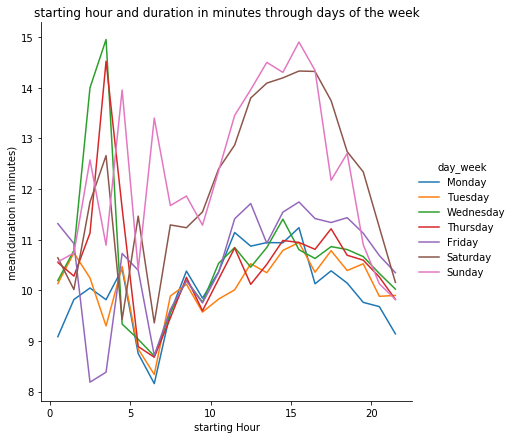

In [27]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bin_edges = np.arange(0, df2['start_hour'].max(), 1);
g = sb.FacetGrid(data = df2, hue = 'day_week', hue_order=days_order , size = 6);
g.map(mean_poly, "start_hour", "duration_minutes", bins = bin_edges);
g.set_ylabels('mean(duration in minutes)');
g.set_xlabels('starting Hour');
plt.title('starting hour and duration in minutes through days of the week');
g.add_legend();

## Average of duration in minutes over start hour per each user type

It is also clear that in the along a day there are different pattern of duration in minutes increses see time priod between 04:00 to 05:00 

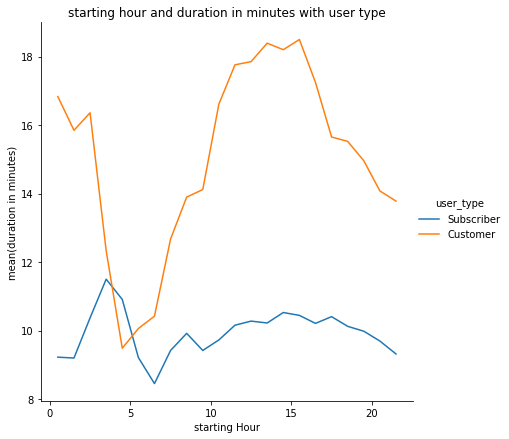

In [21]:
bin_edges = np.arange(0, df2['start_hour'].max(), 1);
g = sb.FacetGrid(data = df2, hue = 'user_type', size = 6);
g.map(mean_poly, "start_hour", "duration_minutes", bins = bin_edges);
g.set_ylabels('mean(duration in minutes)');
g.set_xlabels('starting Hour');
plt.title('starting hour and duration in minutes with user type');
g.add_legend();

In [32]:
!jupyter nbconvert "slide_deck_fordgobike.ipynb" --to slides --template output_toggle

[NbConvertApp] Converting notebook slide_deck_fordgobike.ipynb to slides
[NbConvertApp] Writing 512064 bytes to slide_deck_fordgobike.slides.html


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!